## 0.1 Import Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

! pip install datasist
from datasist.structdata import detect_outliers

## 0.2 Load Data

In [5]:
df = pd.read_csv('/content/full_data.csv')
df.head()

,time,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
0,01:01:2018:00:00,27412.81,27412.81,6926.78,4820.40,5226.32,1900.32,5314.05,1179.51,0.0,...,278.20,189.5,210.96,0.0,0.0,297.0,92.08,207.60,55.04,45.97
1,01:01:2018:01:00,26324.39,26324.39,6603.44,3644.32,5277.19,1877.83,5715.61,1148.46,0.0,...,284.82,205.5,211.67,0.0,0.0,287.0,91.14,205.34,54.44,45.47
2,01:01:2018:02:00,24635.32,24635.32,6040.77,2711.00,5325.47,1708.49,5701.37,1216.38,0.0,...,278.20,201.5,209.89,0.0,0.0,169.0,91.06,164.94,43.73,36.53
3,01:01:2018:03:00,23872.12,23872.12,5938.46,2524.37,5265.91,1662.59,5205.43,1298.11,0.0,...,271.57,211.5,211.24,0.0,0.0,214.0,91.83,154.52,40.97,34.22
4,01:01:2018:04:00,23194.89,23194.89,5665.41,2462.71,5282.88,1697.96,4804.19,1220.91,0.0,...,273.78,307.5,214.31,0.0,0.0,203.0,91.23,112.64,29.86,24.95


In [6]:
df.columns

Index(['time', 'consumption_MWh', 'total_generation_MWh', 'natural_gas',
       'hydro_dam', 'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar',
       'fuel_oil', 'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass',
       'naphtha', 'LNG', 'international', 'waste_heat', 'TRY/MWh', 'USD/MWh',
       'EUR/MWh'],
      dtype='object')

## 0.3 EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  52584 non-null  object 
 1   consumption_MWh       52584 non-null  float64
 2   total_generation_MWh  52584 non-null  float64
 3   natural_gas           52584 non-null  float64
 4   hydro_dam             52584 non-null  float64
 5   lignite               52584 non-null  float64
 6   hydro_river           52584 non-null  float64
 7   coal_imported         52584 non-null  float64
 8   wind                  52584 non-null  float64
 9   solar                 52584 non-null  float64
 10  fuel_oil              52584 non-null  float64
 11  geothermal            52584 non-null  float64
 12  asphaltite_coal       52584 non-null  float64
 13  hard_coal             52584 non-null  float64
 14  biomass               52584 non-null  float64
 15  naphtha            

In [8]:
df.describe()

,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,fuel_oil,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,...,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,35166.891649,34399.243138,8725.505190,5614.316871,4901.607249,2219.311611,7128.778313,3137.646356,167.942769,83.699436,...,235.883465,415.177407,590.215587,0.0,0.018057,52.954873,81.734692,996.139021,72.190211,65.793224
std,5743.832244,5272.179656,4027.024572,2846.858883,616.084315,1333.785556,1823.970761,1910.953417,340.820824,54.734514,...,82.835939,115.472528,251.158824,0.0,0.167291,360.610536,13.671189,1126.233416,49.815156,49.431674
min,15333.300000,15333.300000,496.660000,296.690000,2189.100000,379.960000,956.350000,42.530000,-1.700000,0.000000,...,0.000000,77.500000,202.580000,0.0,0.000000,-3130.500000,30.690000,0.000000,0.000000,0.000000
25%,30814.882500,30485.697500,5648.690000,3333.605000,4555.622500,1140.782500,5931.242500,1577.745000,0.000000,37.000000,...,196.500000,331.500000,359.625000,0.0,0.000000,-216.617500,73.120000,280.000000,42.850000,36.090000
50%,35063.730000,34438.515000,8863.035000,5362.740000,4946.670000,1725.255000,7604.270000,2817.655000,3.510000,71.900000,...,231.830000,415.015000,543.140000,0.0,0.000000,0.000000,82.140000,326.815000,54.350000,48.210000
75%,39281.595000,38188.935000,11551.372500,7667.975000,5314.530000,3167.205000,8456.725000,4403.705000,115.470000,98.162500,...,320.150000,510.540000,852.662500,0.0,0.000000,333.000000,91.220000,1699.000000,84.920000,78.012500
max,55575.020000,51285.690000,19453.650000,15891.780000,6984.150000,6103.590000,11352.140000,9737.590000,1547.410000,237.600000,...,368.720000,692.620000,1039.900000,0.0,1.880000,1648.540000,127.760000,4800.000000,264.170000,271.630000


## Maybe there are outlayes in these columns (hydro_river, wind, solar, fuel_oil, LNG, International)

In [9]:
df['time'] = pd.to_datetime(df['time'], format='%d:%m:%Y:%H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  52584 non-null  datetime64[ns]
 1   consumption_MWh       52584 non-null  float64       
 2   total_generation_MWh  52584 non-null  float64       
 3   natural_gas           52584 non-null  float64       
 4   hydro_dam             52584 non-null  float64       
 5   lignite               52584 non-null  float64       
 6   hydro_river           52584 non-null  float64       
 7   coal_imported         52584 non-null  float64       
 8   wind                  52584 non-null  float64       
 9   solar                 52584 non-null  float64       
 10  fuel_oil              52584 non-null  float64       
 11  geothermal            52584 non-null  float64       
 12  asphaltite_coal       52584 non-null  float64       
 13  hard_coal       

In [10]:
# Extract time-based features
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek      # Monday=0, Sunday=6
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['season'] = df['month'] % 12 // 3 + 1          # 1=Winter, 2=Spring, 3=Summer, 4=Fall

# Optional: create 'date' column for daily-level aggregation (used in clustering)
df['date'] = df['time'].dt.date

# Preview the new columns
df[['time', 'hour', 'day_of_week', 'month', 'year', 'season', 'date']].head()

,time,hour,day_of_week,month,year,season,date
0,2018-01-01 00:00:00,0,0,1,2018,1,2018-01-01
1,2018-01-01 01:00:00,1,0,1,2018,1,2018-01-01
2,2018-01-01 02:00:00,2,0,1,2018,1,2018-01-01
3,2018-01-01 03:00:00,3,0,1,2018,1,2018-01-01
4,2018-01-01 04:00:00,4,0,1,2018,1,2018-01-01


## 0.4 Analysis Questions

## 1. What are the hourly, daily, and monthly patterns in electricity consumption?

In [11]:
avg_monthly = df.groupby('month')['consumption_MWh'].mean()
avg_monthly

,consumption_MWh
month,
1,35843.967991
2,35383.759295
3,34438.535457
4,32319.647442
5,31904.777298
6,34011.946938
7,38928.340524
8,39685.727668
9,36419.433245


In [12]:
avg_hourly = df.groupby('hour')['consumption_MWh'].mean()
avg_hourly

,consumption_MWh
hour,
0,33246.570055
1,31646.914747
2,30506.378759
3,29761.890625
4,29416.719466
5,29193.689941
6,29284.841127
7,30622.287481
8,34439.408608


In [13]:
avg_daily = df.groupby('day_of_week')['consumption_MWh'].mean()
avg_daily

,consumption_MWh
day_of_week,
0,35325.736179
1,36231.999921
2,36419.527738
3,36512.130523
4,36181.176540
5,34441.033572
6,31056.637066


Peak consumption is between 10 AM to 8 PM, especially 11 AM–6 PM

Weekdays (Mon–Fri) have higher demand than weekends

Highest consumption months are July and August

## 2. How does electricity demand differ between weekdays and weekends?

In [14]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
weekend_avg = df.groupby('is_weekend')['consumption_MWh'].mean()
weekend_avg

,consumption_MWh
is_weekend,
0,36134.114181
1,32748.835319


Weekdays (0): 36,134 MWh

Weekends (1): 32,748 MWh

Demand is about 10% lower on weekends

## 3. Are there significant seasonal trends in electricity usage?

In [15]:
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season_name'] = df['season'].map(season_map)
seasonal_avg = df.groupby('season_name')['consumption_MWh'].mean()
seasonal_avg

,consumption_MWh
season_name,
Fall,34468.576289
Spring,32893.827377
Summer,37580.375240
Winter,35728.386513


Summer: 37,580 MWh

Winter: 35,728 MWh

Summer > Winter > Fall > Spring

## 4. Which year had the highest average electricity consumption?

In [16]:
avg_year = df.groupby('year')['consumption_MWh'].mean().sort_values(ascending=False)
avg_year

,consumption_MWh
year,
2021,37305.333148
2023,37023.165500
2022,36964.542957
2018,33356.452541
2019,33227.058177
2020,33130.377061


2021: 37,305 MWh

2023: 37,023 MWh

The highest average was in 2021

## 5. What % of total electricity generation comes from renewable vs. fossil sources?

In [17]:
fossil = ['natural_gas', 'coal_imported', 'fuel_oil', 'asphaltite_coal', 'hard_coal', 'lignite', 'LNG', 'naphtha']
renewable = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat']

total_gen = df[fossil + renewable].sum().sum()
fossil_share = df[fossil].sum().sum() / total_gen * 100
renewable_share = df[renewable].sum().sum() / total_gen * 100

print(f"{fossil_share:.2f}% fossil")
print(f"{renewable_share:.2f}% renewable")

62.57% fossil
37.43% renewable


## 6. Which renewable source has shown the most growth?

In [18]:
renewable_growth = df.groupby('year')[renewable].sum()
renewable_growth_diff = renewable_growth.loc[2023] - renewable_growth.loc[2018]
renewable_growth_diff.sort_values(ascending=False)


,0
wind,14017362.38
biomass,5819690.22
solar,3784164.00
hydro_dam,3306872.16
geothermal,3234683.57
hydro_river,661865.34
waste_heat,-26324.65


Wind showed the most growth from 2018 to 2023.



## 7. How often does electricity generation exceed or fall short of consumption?

In [19]:
df['generation_gap'] = df['total_generation_MWh'] - df['consumption_MWh']
over_generation = (df['generation_gap'] > 0).mean() * 100
under_generation = (df['generation_gap'] < 0).mean() * 100

print(f"Percentage of time generation exceeds consumption: {over_generation:.2f}%")
print(f"Percentage of time generation falls short of consumption: {under_generation:.2f}%")

Percentage of time generation exceeds consumption: 4.20%
Percentage of time generation falls short of consumption: 47.85%


## 8. How do electricity prices correlate with demand and sources?

In [20]:
price_corr = df.corr(numeric_only=True)[['TRY/MWh', 'USD/MWh', 'EUR/MWh']].sort_values(by='TRY/MWh', ascending=False)
price_corr


,TRY/MWh,USD/MWh,EUR/MWh
TRY/MWh,1.000000,0.937953,0.942196
EUR/MWh,0.942196,0.997792,1.000000
USD/MWh,0.937953,1.000000,0.997792
biomass,0.772530,0.621386,0.618090
year,0.726440,0.553948,0.552207
international,0.642401,0.539861,0.551452
geothermal,0.417833,0.338994,0.333802
coal_imported,0.362740,0.336914,0.334295
solar,0.358172,0.265355,0.268717
consumption_MWh,0.320964,0.350165,0.328883


## 9. How has the reliance on each energy source changed from 2018 to 2023?

In [21]:
energy_change_by_year = df.groupby('year')[fossil + renewable].mean()
energy_change_by_year

,natural_gas,coal_imported,fuel_oil,asphaltite_coal,hard_coal,lignite,LNG,naphtha,hydro_dam,hydro_river,solar,wind,biomass,geothermal,waste_heat
year,,,,,,,,,,,,,,,
2018,10283.698613,7094.666848,163.184301,265.719451,285.882220,5116.567597,0.108394,0.0,4667.335513,2149.645188,6.551253,2255.241364,263.190954,788.308318,79.199919
2019,6265.231647,6895.333550,105.784056,265.269563,390.455482,5333.149824,0.000000,0.0,7491.348740,2623.583966,21.451678,2455.739798,359.448858,939.464458,75.258225
2020,7749.607826,7111.391878,35.637369,253.059575,430.980944,4302.084995,0.000000,0.0,6525.588819,2335.308297,47.932729,2787.645651,462.839926,1060.608119,79.494370
2021,12253.430140,6265.539489,38.429685,270.885213,443.024031,4905.869929,0.000000,0.0,4630.314147,1702.417385,176.859444,3527.486322,673.302987,1153.637252,93.731733
2022,8203.678959,7213.592451,79.276674,179.005194,466.794443,5110.437213,0.000000,0.0,5323.985038,2279.396439,316.656862,3945.327017,855.320616,1167.059610,86.535220
2023,7600.057646,8192.193297,80.016208,181.314733,473.884023,4643.176459,0.000000,0.0,5044.832334,2225.200592,438.533445,3855.396887,927.539153,1157.564434,76.194822


Observation:

Solar grew from 6 → 438 MWh

Wind from 2,255 → 3,855 MWh

Biomass and Geothermal also grew

Natural gas and coal remained dominant, though fluctuating

## 10. What is the variability of solar and wind throughout the day and year?

In [22]:
solar_hourly_avg = df.groupby('hour')['solar'].mean()
wind_hourly_avg = df.groupby('hour')['wind'].mean()
solar_variability_year = df.groupby('year')['solar'].std()
wind_variability_year = df.groupby('year')['wind'].std()

hourly_avg_table = pd.DataFrame({
    'Average Solar (MWh)': solar_hourly_avg,
    'Average Wind (MWh)': wind_hourly_avg
})

yearly_variability_table = pd.DataFrame({
    'Yearly Solar Std Dev (MWh)': solar_variability_year,
    'Yearly Wind Std Dev (MWh)': wind_variability_year
})

print("Hourly Average Generation (MWh):")
display(hourly_avg_table)

print("\nYearly Generation Variability (Standard Deviation in MWh):")
display(yearly_variability_table)

Hourly Average Generation (MWh):


,Average Solar (MWh),Average Wind (MWh)
hour,,
0,0.043692,3173.720429
1,0.009051,3094.442387
2,0.002195,3055.300808
3,0.010703,3037.964601
4,0.194683,3032.154021
5,3.178791,3031.006239
6,34.094989,3030.126417
7,136.493784,2970.049626
8,279.609416,2912.784966



Yearly Generation Variability (Standard Deviation in MWh):


,Yearly Solar Std Dev (MWh),Yearly Wind Std Dev (MWh)
year,,
2018,10.705993,1325.841008
2019,29.918042,1426.280297
2020,66.214273,1609.041412
2021,232.706699,1909.684579
2022,413.867656,2133.833189
2023,555.977787,2155.899788


Solar:

Peaks at 12 PM (~474 MWh)

Standard deviation grew from 10.7 (2018) to 556 (2023)

Wind:

Flatter curve with evening peaks

Variability grew from 1,325 to 2,156



## 11. How dependent is the system on imported electricity during peak hours (16–21)?

In [23]:
avg_import_peak = df[df['hour'].between(16, 21)]['international'].mean()
avg_import_all = df['international'].mean()

print(f"Average import during peak hours: {avg_import_peak:.2f} MWh")
print(f"Overall average import: {avg_import_all:.2f} MWh")

Average import during peak hours: 14.89 MWh
Overall average import: 52.95 MWh


The system uses less imported electricity during peak times — relies on internal sources.

## 12. Which energy sources are most associated with high pricing periods?

In [24]:
high_price_df = df[df['TRY/MWh'] >= df['TRY/MWh'].quantile(0.90)]
avg_sources_high_price = high_price_df[fossil + renewable].mean().sort_values(ascending=False)

avg_sources_high_price

,0
natural_gas,10171.450550
coal_imported,8864.441879
lignite,5003.822137
hydro_dam,4589.282307
wind,3500.756988
hydro_river,1363.417507
geothermal,1157.418403
biomass,896.047313
hard_coal,460.824489
solar,336.022839


Fossil fuels dominate high-price periods.

## 13. How do electricity prices correlate with demand levels?

In [25]:
corr_demand_price = df[['consumption_MWh', 'TRY/MWh']].corr().iloc[0, 1]
corr_demand_usd = df[['consumption_MWh', 'USD/MWh']].corr().iloc[0, 1]
corr_demand_eur = df[['consumption_MWh', 'EUR/MWh']].corr().iloc[0, 1]
print(f"Correlation between Consumption and TRY/MWh: {corr_demand_price:.2f}")
print(f"Correlation between Consumption and USD/MWh: {corr_demand_usd:.2f}")
print(f"Correlation between Consumption and EUR/MWh: {corr_demand_eur:.2f}")

Correlation between Consumption and TRY/MWh: 0.32
Correlation between Consumption and USD/MWh: 0.35
Correlation between Consumption and EUR/MWh: 0.33


## 14. Is there a seasonal or annual trend in electricity prices?

In [26]:
seasonal_price_avg = df.groupby('season')['TRY/MWh'].mean()
annual_price_avg = df.groupby('year')['TRY/MWh'].mean()

print("Average TRY/MWh by Season:")
display(seasonal_price_avg)

print("\nAverage TRY/MWh by Year:")
display(annual_price_avg)

Average TRY/MWh by Season:


,TRY/MWh
season,
1,1031.858132
2,769.885790
3,971.949472
4,1213.941906



Average TRY/MWh by Year:


,TRY/MWh
year,
2018,231.636362
2019,260.320358
2020,278.716692
2021,508.102013
2022,2510.721584
2023,2189.302656


Prices exploded in 2022–2023 and peak in Fall/Winter

## 15. How do currency fluctuations affect local pricing in TRY?

In [27]:
currency_corr = df[['TRY/MWh', 'USD/MWh', 'EUR/MWh']].corr()

print("Correlation between TRY/MWh and other currencies:")
display(currency_corr)

Correlation between TRY/MWh and other currencies:


,TRY/MWh,USD/MWh,EUR/MWh
TRY/MWh,1.000000,0.937953,0.942196
USD/MWh,0.937953,1.000000,0.997792
EUR/MWh,0.942196,0.997792,1.000000


TRY/MWh price moves almost identically with foreign prices

## 16. What are the strongest predictors of electricity price (TRY/MWh)?

In [28]:
top_price_predictors = df.corr(numeric_only=True)['TRY/MWh'].sort_values(ascending=False).head(10)
top_price_predictors

,TRY/MWh
TRY/MWh,1.000000
EUR/MWh,0.942196
USD/MWh,0.937953
biomass,0.772530
year,0.726440
international,0.642401
geothermal,0.417833
coal_imported,0.362740
solar,0.358172
consumption_MWh,0.320964


Price is driven by currency, imports, and some renewables (biomass, solar).

## 17. Are there any surprising negative or positive correlations with price (TRY/MWh)?

In [29]:
top_neg_correlations = df.corr(numeric_only=True)['TRY/MWh'].sort_values().head(5)
top_price_predictors

,TRY/MWh
TRY/MWh,1.000000
EUR/MWh,0.942196
USD/MWh,0.937953
biomass,0.772530
year,0.726440
international,0.642401
geothermal,0.417833
coal_imported,0.362740
solar,0.358172
consumption_MWh,0.320964


Hydro and fuel oil are negatively correlated with price.

## 0.5 Visualization

In [30]:
# Hourly Electricity Consumption
hourly_consumption = df.groupby('hour')['consumption_MWh'].mean().reset_index()
fig_hourly = px.line(hourly_consumption, x='hour', y='consumption_MWh',
                     title='Average Hourly Electricity Consumption (MWh)',
                     labels={'consumption_MWh': 'Avg Consumption (MWh)', 'hour': 'Hour of Day'})
fig_hourly.show()

This line graph reveals the average electricity consumption by hour of the day.

**Insight**:

Consumption rises sharply from 6 AM and peaks between 11 AM and 6 PM,

*   Consumption rises sharply from 6 AM and peaks between 11 AM and 6 PM,
reflecting typical daytime and business activity.

*   Demand tapers off during nighttime hours.



In [31]:
# Monthly Electricity Consumption
monthly_consumption = df.groupby('month')['consumption_MWh'].mean().reset_index()
fig_monthly = px.bar(monthly_consumption, x='month', y='consumption_MWh',
                     title='Average Monthly Electricity Consumption',
                     labels={'month': 'Month', 'consumption_MWh': 'Avg Consumption (MWh)'})
fig_monthly.show()

Average monthly electricity demand throughout the year.

**Insight**:



*   Peaks appear in July and August, likely due to air conditioning use.

*   A second smaller peak may occur in January or February due to winter heating.

*   This confirms seasonal effects on demand.


In [32]:
# Weekday vs Weekend Electricity Consumption
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
weekend_consumption = df.groupby('is_weekend')['consumption_MWh'].mean().reset_index()
fig_weekend = px.bar(weekend_consumption, x='is_weekend', y='consumption_MWh',
                     title='Weekday vs Weekend Electricity Consumption',
                     labels={'is_weekend': 'Day Type', 'consumption_MWh': 'Avg Consumption (MWh)'})
fig_weekend.show()

Average electricity consumption on weekdays versus weekends.

**Insight**:

*   Weekdays show higher demand, consistent with industrial and commercial activity.

*  Weekends show a drop, reflecting residential-dominant patterns.


In [33]:
# Seasonal Electricity Consumption
df['season_name'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
seasonal_consumption = df.groupby('season_name')['consumption_MWh'].mean().reset_index()
fig_seasonal = px.bar(seasonal_consumption, x='season_name', y='consumption_MWh',
                      title='Average Seasonal Electricity Consumption',
                      labels={'season_name': 'Season', 'consumption_MWh': 'Avg Consumption (MWh)'})
fig_seasonal.show()

Compares average consumption across the four seasons.

**Insight**:

*   Summer and Winter have the highest demand due to cooling and heating.

*   Spring has the lowest usage — likely due to mild weather and fewer appliances in use.


In [34]:
# Fossil vs Renewable Share
fossil_total = df[fossil].sum().sum()
renewable_total = df[renewable].sum().sum()

fig_fossil_vs_renewable = px.pie(
    values=[fossil_total, renewable_total],
    names=['Fossil', 'Renewable'],
    title='Electricity Generation Share: Fossil vs Renewable'
)
fig_fossil_vs_renewable.show()

Total electricity generation split between fossil and renewable sources.

**Insight**:



*   Fossil fuels dominate (~63%) the energy mix.

*   Renewables account for ~37%, with room to grow; highlighting the opportunity for green investment.


In [35]:
# Change in Energy Source by Year
energy_sources = fossil + renewable
energy_by_year = df.groupby('year')[energy_sources].mean().reset_index()

fig_energy_by_year = px.bar(
    energy_by_year,
    x='year',
    y=energy_sources,
    title='Average Electricity Generation by Source (2018–2023)',
    labels={'value': 'Avg MWh', 'variable': 'Energy Source'},
    barmode='stack'
)
fig_energy_by_year.show()

Average generation from each energy source between 2018 and 2023.

**Insight**:



*   Renewables like solar and wind have grown steadily.

*   Coal and natural gas remain heavy contributors.

*   This chart captures how energy strategy is shifting slowly.


In [36]:
# Solar/Wind Hourly Patterns
solar_hourly = df.groupby('hour')['solar'].mean().reset_index()
wind_hourly = df.groupby('hour')['wind'].mean().reset_index()

fig_solar_wind_hourly = go.Figure()
fig_solar_wind_hourly.add_trace(go.Scatter(x=solar_hourly['hour'], y=solar_hourly['solar'],
                                           mode='lines+markers', name='Solar'))
fig_solar_wind_hourly.add_trace(go.Scatter(x=wind_hourly['hour'], y=wind_hourly['wind'],
                                           mode='lines+markers', name='Wind'))

fig_solar_wind_hourly.update_layout(
    title='Average Hourly Generation: Solar vs Wind',
    xaxis_title='Hour of Day',
    yaxis_title='Avg Generation (MWh)',
    legend_title='Source'
)
fig_solar_wind_hourly.show()

The average generation of solar and wind energy by hour of day.

**Insight**:



*   Solar peaks at noon and disappears at night.

*   Wind is more stable but has a slight peak in the evening.

*   Together, they suggest when renewable energy is most available.



In [37]:
# Year-over-Year Growth in Renewable Sources
renewable_sources_selected = ['solar', 'wind', 'hydro_dam', 'hydro_river']
renewable_by_year = df.groupby('year')[renewable_sources_selected].mean().reset_index()

fig_renewable_growth = px.bar(
    renewable_by_year,
    x='year',
    y=renewable_sources_selected,
    barmode='group',
    title='Year-over-Year Growth in Renewable Sources',
    labels={'value': 'Avg Generation (MWh)', 'variable': 'Energy Source'}
)
fig_renewable_growth.show()

This grouped bar chart illustrates the average annual generation from key renewable sources — solar, wind, hydro dam, and hydro river — between 2018 and 2023.

**Insight**:



*   Wind energy shows the most consistent and significant growth year over year.

*   Solar energy has increased dramatically since 2020, reflecting investment in photovoltaic infrastructure.

*   Hydro (dam and river) shows variable performance depending on rainfall and seasonal water flow.




In [38]:
# Annual Electricity Price (TRY/MWh)
annual_price = df.groupby('year')['TRY/MWh'].mean().reset_index()

fig_annual_price = px.bar(
    annual_price,
    x='year',
    y='TRY/MWh',
    title='Average Annual Electricity Price (TRY/MWh)',
    labels={'TRY/MWh': 'Price (TRY)', 'year': 'Year'}
)
fig_annual_price.show()

Tracks the average electricity price per year in TRY.

**Insight**:

*   Prices were stable until 2021, then skyrocketed in 2022–2023 — likely due to inflation, currency devaluation, or energy crisis.


In [39]:
# Correlation Heatmap
correlation_matrix = df.corr(numeric_only=True).round(2)

fig_corr_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis'))

fig_corr_heatmap.update_layout(
    title='Correlation Heatmap of Numerical Features',
    xaxis_nticks=36
)
fig_corr_heatmap.show()

Visual matrix of correlations between all numerical variables.

**Insight**:



*   TRY/MWh is highly correlated with USD/MWh, EUR/MWh, and Biomass generation.

*   Negative correlations with hydro and imbalance (surplus reduces price).

*   Useful for feature selection in ML models.


In [40]:
# Top Energy Sources in High Price Hours
high_price_threshold = df['TRY/MWh'].quantile(0.90)
high_price_df = df[df['TRY/MWh'] >= high_price_threshold]
avg_sources_high_price = high_price_df[fossil + renewable].mean().sort_values(ascending=False).reset_index()
avg_sources_high_price.columns = ['Source', 'Avg MWh']

fig_high_price_sources = px.bar(
    avg_sources_high_price.head(10),
    x='Avg MWh',
    y='Source',
    orientation='h',
    title='Top Energy Sources During High Price Hours'
)
fig_high_price_sources.show()

The top 10 sources contributing the most during high price periods.

**Insight**:



*   Natural gas and imported coal dominate expensive hours.

*   High reliance on these sources drives up prices, while renewables contribute less during peaks.



## 0.6 Data Preprocessing

In [41]:
# Handling Missing Values
df.isna().sum()

,0
time,0
consumption_MWh,0
total_generation_MWh,0
natural_gas,0
hydro_dam,0
lignite,0
hydro_river,0
coal_imported,0
wind,0
solar,0


In [42]:
# Drop unwanted columns
df_copy = df.copy()

In [43]:
df.drop(columns=['date', 'USD/MWh', 'EUR/MWh','time', 'naphtha'], axis = 1, inplace=True, errors='ignore')
df.columns

Index(['consumption_MWh', 'total_generation_MWh', 'natural_gas', 'hydro_dam',
       'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar', 'fuel_oil',
       'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass', 'LNG',
       'international', 'waste_heat', 'TRY/MWh', 'hour', 'day_of_week',
       'month', 'year', 'season', 'is_weekend', 'season_name',
       'generation_gap'],
      dtype='object')

In [44]:
# Handle Outliers
indices = detect_outliers(df, 0, df.select_dtypes(include='number'))
df.drop(indices, inplace=True)

## 0.7 Split input and output

In [46]:
X = df.drop(columns=['TRY/MWh'], axis=1)
y = df['TRY/MWh']

In [50]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,fuel_oil,...,hour,day_of_week,month,year,season,generation_gap,is_weekend_Weekend,season_name_Spring,season_name_Summer,season_name_Winter
0,27412.81,27412.81,6926.78,4820.40,5226.32,1900.32,5314.05,1179.51,0.0,176.60,...,0,0,1,2018,1,0.0,0,0,0,1
1,26324.39,26324.39,6603.44,3644.32,5277.19,1877.83,5715.61,1148.46,0.0,174.20,...,1,0,1,2018,1,0.0,0,0,0,1
2,24635.32,24635.32,6040.77,2711.00,5325.47,1708.49,5701.37,1216.38,0.0,177.91,...,2,0,1,2018,1,0.0,0,0,0,1
3,23872.12,23872.12,5938.46,2524.37,5265.91,1662.59,5205.43,1298.11,0.0,171.50,...,3,0,1,2018,1,0.0,0,0,0,1
4,23194.89,23194.89,5665.41,2462.71,5282.88,1697.96,4804.19,1220.91,0.0,165.00,...,4,0,1,2018,1,0.0,0,0,0,1


##  0.8 Split data into train and test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 0.9 Scaling

In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [63]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression Results:")
print("R² Score:", round(r2, 4))
print("MAE:", round(mae, 2), "TRY")
print("RMSE:", round(rmse, 2), "TRY")

📊 Linear Regression Results:
R² Score: 0.8316
MAE: 239.28 TRY
RMSE: 355.61 TRY


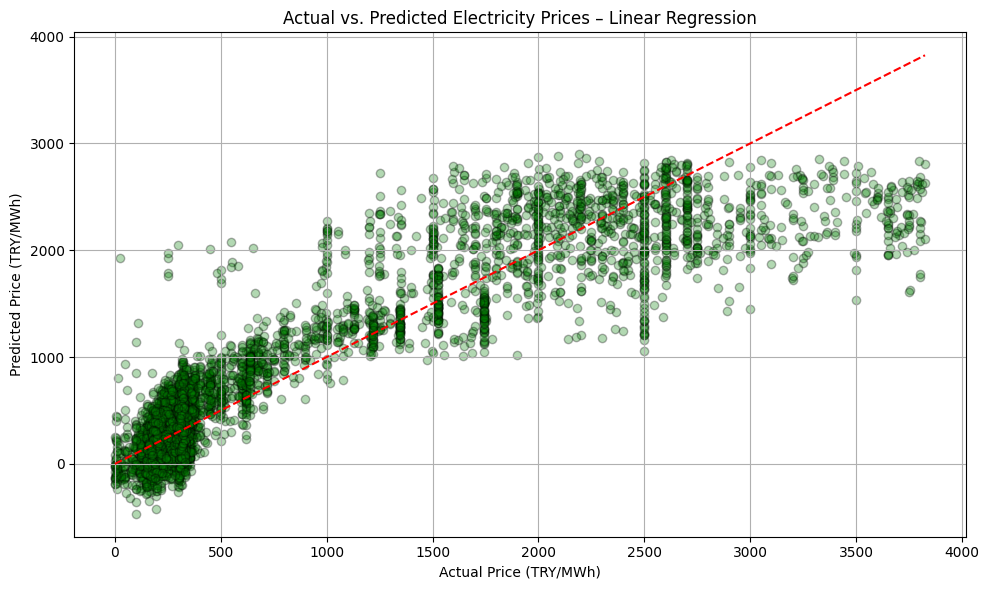

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (TRY/MWh)")
plt.ylabel("Predicted Price (TRY/MWh)")
plt.title("Actual vs. Predicted Electricity Prices – Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.savefig("lr_actual_vs_predicted.png")
plt.show()

Interpretation:
Predictions follow the red identity line fairly well, indicating decent model performance.

However, there's more scatter compared to Random Forest — especially at higher prices — suggesting:

  Underfitting on complex patterns

  Less accuracy for extreme values

In [66]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("R² Score:", round(r2_rf, 4))
print("MAE:", round(mae_rf, 2), "TRY")
print("RMSE:", round(rmse_rf, 2), "TRY")

Random Forest Regression Results:
R² Score: 0.9751
MAE: 56.79 TRY
RMSE: 136.85 TRY


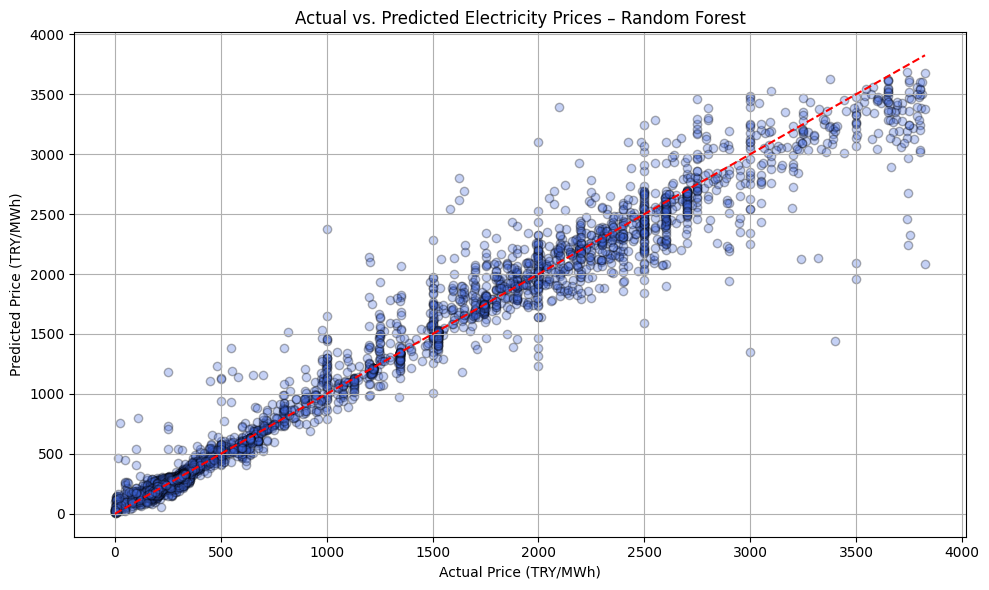

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (TRY/MWh)")
plt.ylabel("Predicted Price (TRY/MWh)")
plt.title("Actual vs. Predicted Electricity Prices – Random Forest")
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_actual_vs_predicted.png")
plt.show()

The red dashed line shows perfect prediction (Predicted = Actual).

Blue dots represent your model’s predictions.

**Interpretation**:
Most points are very close to the red line → strong predictive accuracy.

Slight variance at extreme values, but overall fit is excellent.

Confirms Random Forest generalizes well to new data.

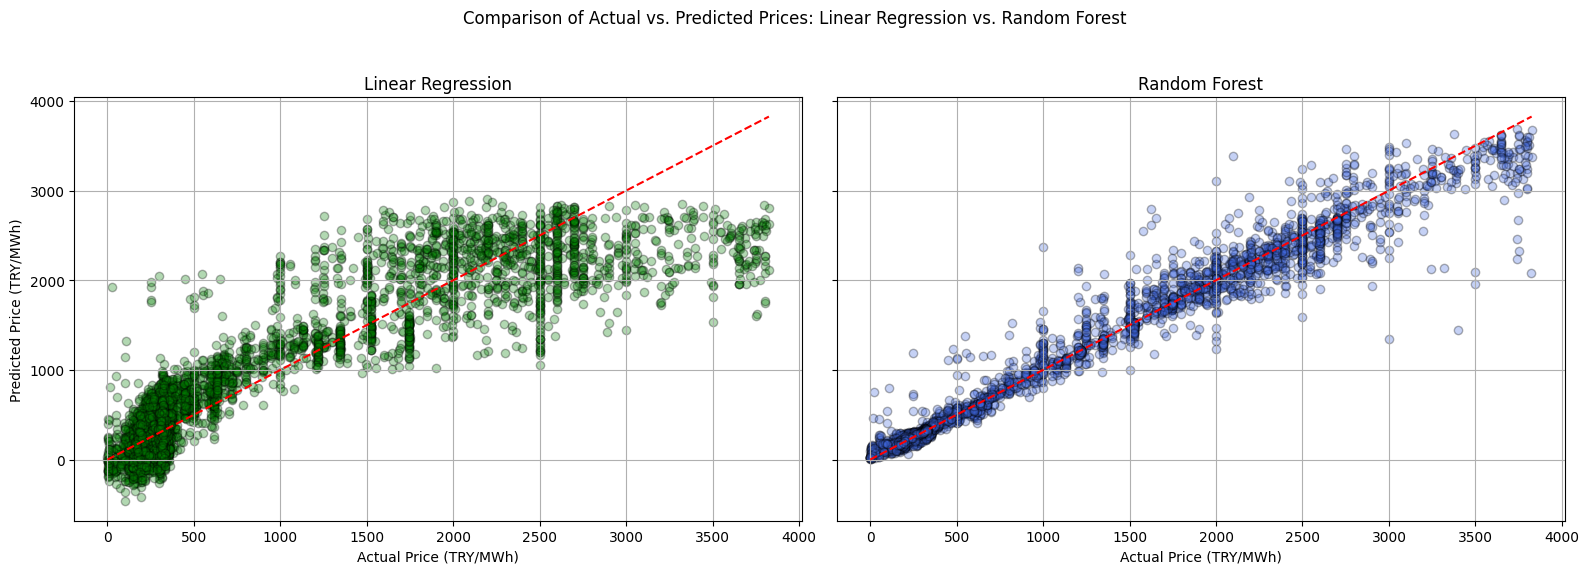

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Linear Regression plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.3, color='green', edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Actual Price (TRY/MWh)")
axes[0].set_ylabel("Predicted Price (TRY/MWh)")
axes[0].grid(True)

# Random Forest plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.3, color='royalblue', edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Actual Price (TRY/MWh)")
axes[1].grid(True)

plt.suptitle("Comparison of Actual vs. Predicted Prices: Linear Regression vs. Random Forest")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("comparison_lr_vs_rf.png")
plt.show()

Left: Linear Regression
*   More scatter
*   Weaker fit, especially at high prices

Right: Random Forest
*   Points tightly follow the red identity line
*   Much better accuracy across all price levels
